In [1]:
# Good old pandas and numpy
import pandas as pd
import numpy as np

# Unfortunately I'm still using matplotlib for graphs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def objective(x):
    """Objective function to minimize"""
    
    # Create the polynomial object
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100])

    # Return the value of the polynomial
    return f(x) * 0.05

Minimum of -219.8012 occurs at 4.8779


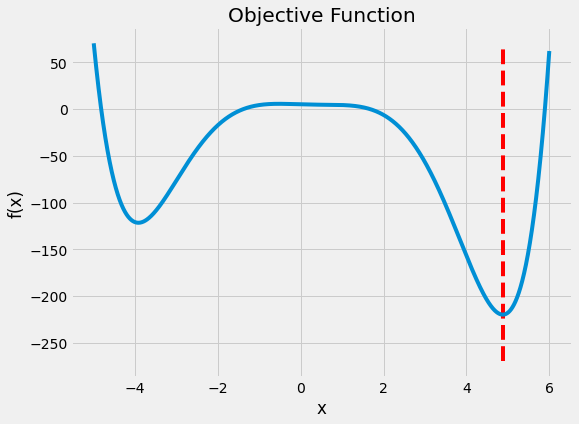

In [6]:
# Space over which to evluate the function is -5 to 6
x = np.linspace(-5, 6, 10000)
y = objective(x)

miny = min(y)
minx = x[np.argmin(y)]

# Visualize the function
plt.figure(figsize = (8, 6))
plt.style.use('fivethirtyeight')
plt.title('Objective Function'); plt.xlabel('x'); plt.ylabel('f(x)')
plt.vlines(minx, min(y)- 50, max(y), linestyles = '--', colors = 'r')
plt.plot(x, y);

# Print out the minimum of the function and value
print('Minimum of %0.4f occurs at %0.4f' % (miny, minx))

In [7]:
from hyperopt import hp

# Create the domain space
space = hp.uniform('x', -5, 6)

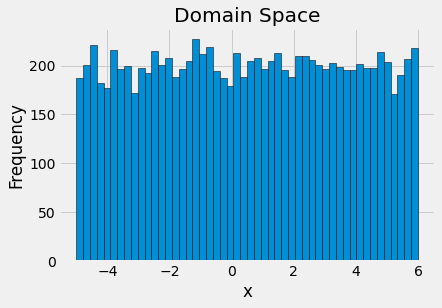

In [24]:
from hyperopt.pyll.stochastic import sample


samples = []

# Sample 10000 values from the range
for _ in range(10000):
    samples.append(sample(space))
    

# Histogram of the values
plt.hist(samples, bins = 50, edgecolor = 'black'); 
plt.xlabel('x'); plt.ylabel('Frequency'); plt.title('Domain Space');

In [ ]:
from hyperopt.pyll.stochastic import sample


samples = []

# Sample 10000 values from the range
for _ in range(10000):
    samples.append(sample(space))

In [25]:
from hyperopt import rand, tpe

# Create the algorithms
tpe_algo = tpe.suggest
rand_algo = rand.suggest

In [26]:
from hyperopt import Trials

# Create two trials objects
tpe_trials = Trials()
rand_trials = Trials()

In [52]:
from hyperopt import fmin

# Run 2000 evals with the tpe algorithm
tpe_best = fmin(fn=objective, space=space, algo=tpe_algo, trials=tpe_trials, 
                max_evals=2000, rstate= np.random.default_rng(50))

print(tpe_best)

# Run 2000 evals with the random algorithm
rand_best = fmin(fn=objective, space=space, algo=rand_algo, trials=rand_trials, 
                 max_evals=2000, rstate= np.random.default_rng(50))

100%|███████████████████████████████| 2000/2000 [00:00<?, ?trial/s, best loss=?]
{'x': 4.876852885822449}
100%|███████████████████████████████| 2000/2000 [00:00<?, ?trial/s, best loss=?]


In [53]:
# Print out information about losses
print('Minimum loss attained with TPE:    {:.4f}'.format(tpe_trials.best_trial['result']['loss']))
print('Minimum loss attained with random: {:.4f}'.format(rand_trials.best_trial['result']['loss']))
print('Actual minimum of f(x):            {:.4f}'.format(miny))

# Print out information about number of trials
print('\nNumber of trials needed to attain minimum with TPE:    {}'.format(tpe_trials.best_trial['misc']['idxs']['x'][0]))
print('Number of trials needed to attain minimum with random: {}'.format(rand_trials.best_trial['misc']['idxs']['x'][0]))

# Print out information about value of x
print('\nBest value of x from TPE:    {:.4f}'.format(tpe_best['x']))
print('Best value of x from random: {:.4f}'.format(rand_best['x']))
print('Actual best value of x:      {:.4f}'.format(minx))

Minimum loss attained with TPE:    -219.8010
Minimum loss attained with random: -219.8008
Actual minimum of f(x):            -219.8012

Number of trials needed to attain minimum with TPE:    1029
Number of trials needed to attain minimum with random: 1124

Best value of x from TPE:    4.8769
Best value of x from random: 4.8763
Actual best value of x:      4.8779


In [57]:
tpe_trials.best_trial

{'state': 2,
 'tid': 1029,
 'spec': None,
 'result': {'loss': -219.80099175991256, 'status': 'ok'},
 'misc': {'tid': 1029,
  'cmd': ('domain_attachment', 'FMinIter_Domain'),
  'workdir': None,
  'idxs': {'x': [1029]},
  'vals': {'x': [4.876852885822449]}},
 'exp_key': None,
 'owner': None,
 'version': 0,
 'book_time': datetime.datetime(2022, 6, 15, 17, 31, 20, 957000),
 'refresh_time': datetime.datetime(2022, 6, 15, 17, 31, 20, 957000)}

In [47]:
tpe_trials.best_trial['misc']['idxs']['x'][0]

1029

In [51]:
tpe_best

{'x': 4.876852885822449}

In [58]:
%%timeit -n 3
# Run 2000 evals with the tpe algorithm
best = fmin(fn=objective, space=space, algo=tpe_algo, max_evals=200)

100%|█████| 200/200 [00:00<00:00, 1171.54trial/s, best loss: -219.7538814639666]
172 ms ± 4.41 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [59]:
%%timeit -n 3

# Run 2000 evals with the random algorithm
best = fmin(fn=objective, space=space, algo=rand_algo, max_evals=200)

100%|█████| 200/200 [00:00<00:00, 5283.60trial/s, best loss: -214.8460048080112]
39.9 ms ± 4.33 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [60]:
tpe_results = pd.DataFrame({'loss': [x['loss'] for x in tpe_trials.results], 'iteration': tpe_trials.idxs_vals[0]['x'],
                            'x': tpe_trials.idxs_vals[1]['x']})
                            
tpe_results.head()

,loss,iteration,x
0,4.243222,4,1.003951
1,-57.738513,5,3.009983
2,-150.326644,6,3.938818
3,-49.041084,7,-2.603459
4,4.567382,8,5.902121


In [76]:
[x['loss'] for x in tpe_trials.results]

[4.243222082165719,
 -57.73851288117626,
 -150.3266439576488,
 -49.041084420984305,
 4.567381571730295,
 -24.867188306176832,
 -20.49825440804538,
 -199.9389227144072,
 -119.71316010327695,
 -6.256295822133075,
 -40.58470674334229,
 1.4916910811661532,
 -101.38150087068576,
 -53.19793945596544,
 -215.7520479249198,
 -8.227447824945655,
 -6.51480028408189,
 -168.9919551192959,
 5.516996758716267,
 -153.60490551762538,
 3.3697995626582187,
 -219.67177347498023,
 22.201599667247276,
 -10.540367233808766,
 -207.97989485655927,
 -219.7607354348421,
 -70.46293524922127,
 46.41476426062207,
 4.248062749039287,
 4.936645766943309,
 -109.41719566051802,
 -9.59377969971572,
 -218.67090342508024,
 -17.5105023046089,
 46.09736102801989,
 1.6765696948386812,
 -121.58801281523998,
 -183.78650122750523,
 4.5536704584956755,
 -159.18975909769193,
 -38.14192979239371,
 5.4944130374466305,
 -1.4606803199587988,
 -70.18612891803224,
 -112.52628736510458,
 -208.21154872234297,
 -156.30601659356768,
 -103.

In [81]:
tpe_results['rolling_average_x'] = tpe_results['x'].rolling(50).mean().fillna(method = 'bfill')
tpe_results['rolling_average_loss'] = tpe_results['loss'].rolling(50).mean().fillna(method = 'bfill')
tpe_results.head()

,loss,iteration,x,rolling_average_x,rolling_average_loss
0,4.243222,4,1.003951,1.831681,-73.491736
1,-57.738513,5,3.009983,1.831681,-73.491736
2,-150.326644,6,3.938818,1.831681,-73.491736
3,-49.041084,7,-2.603459,1.831681,-73.491736
4,4.567382,8,5.902121,1.831681,-73.491736


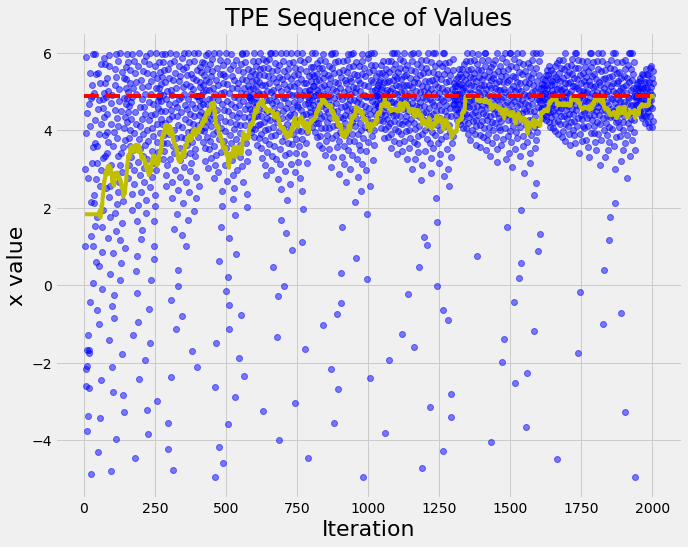

In [94]:
plt.figure(figsize = (10, 8))
plt.plot(tpe_results['iteration'], tpe_results['x'],  'bo', alpha = 0.5);
plt.plot(tpe_results['iteration'], tpe_results['rolling_average_x'],  'y');
plt.xlabel('Iteration', size = 22); plt.ylabel('x value', size = 22); plt.title('TPE Sequence of Values', size = 24);
plt.hlines(minx, 0, 2000, linestyles = '--', colors = 'r');

Best Loss of -219.8010 occured at iteration 1029


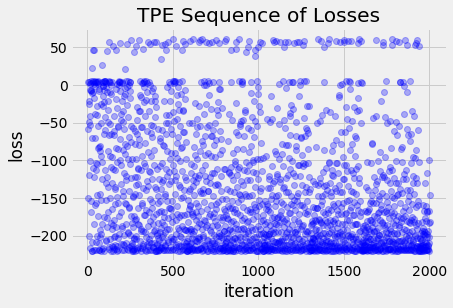

In [97]:
# Sort with best loss first
tpe_results = tpe_results.sort_values('loss', ascending = True).reset_index()

plt.plot(tpe_results['iteration'], tpe_results['loss'], 'bo', alpha = 0.3);
plt.xlabel('iteration'); plt.ylabel('loss'); plt.title('TPE Sequence of Losses');

print('Best Loss of {:.4f} occured at iteration {}'.format(tpe_results['loss'][0], tpe_results['iteration'][0]))

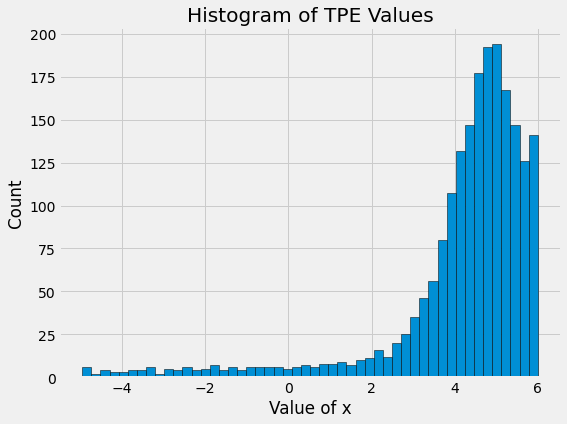

In [96]:
plt.figure(figsize = (8, 6))
plt.hist(tpe_results['x'], bins = 50, edgecolor = 'k');
plt.title('Histogram of TPE Values'); plt.xlabel('Value of x'); plt.ylabel('Count');

In [100]:
rand_results = pd.DataFrame({'loss': [x['loss'] for x in rand_trials.results], 'iteration': rand_trials.idxs_vals[0]['x'],
                            'x': rand_trials.idxs_vals[1]['x']})
                            
rand_results.head()

,loss,iteration,x
0,4.243222,0,1.003951
1,-57.738513,1,3.009983
2,-150.326644,2,3.938818
3,-49.041084,3,-2.603459
4,4.567382,4,5.902121


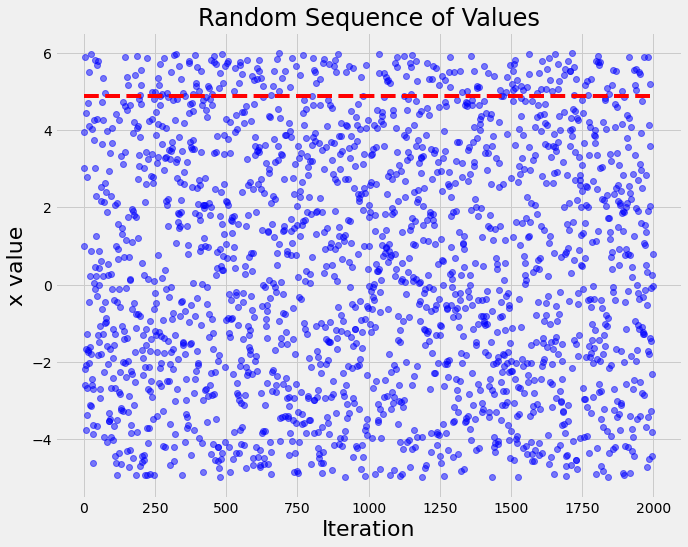

In [101]:
plt.figure(figsize = (10, 8))
plt.plot(rand_results['iteration'], rand_results['x'],  'bo', alpha = 0.5);
plt.xlabel('Iteration', size = 22); plt.ylabel('x value', size = 22); plt.title('Random Sequence of Values', size = 24);
plt.hlines(minx, 0, 2000, linestyles = '--', colors = 'r');

Best Loss of -219.8008 occured at iteration 1124


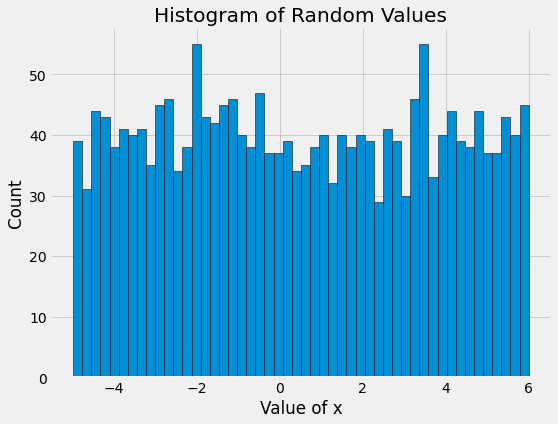

In [102]:
# Sort with best loss first
rand_results = rand_results.sort_values('loss', ascending = True).reset_index()

plt.figure(figsize = (8, 6))
plt.hist(rand_results['x'], bins = 50, edgecolor = 'k');
plt.title('Histogram of Random Values'); plt.xlabel('Value of x'); plt.ylabel('Count');

# Print information
print('Best Loss of {:.4f} occured at iteration {}'.format(rand_results['loss'][0], rand_results['iteration'][0]))

In [117]:
# Normally distributed space
space = hp.normal('x', 4.9, 0.5)

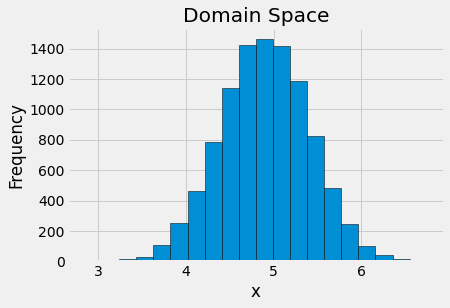

In [118]:
samples = []

# Sample 10000 values from the range
for _ in range(10000):
    samples.append(sample(space))
    

# Histogram of the values
plt.hist(samples, bins = 20, edgecolor = 'black'); 
plt.xlabel('x'); plt.ylabel('Frequency'); plt.title('Domain Space');

In [103]:
from hyperopt import STATUS_OK
from timeit import default_timer as timer

In [119]:
def objective(x):
    """Objective function to minimize with smarter return values"""
    
    # Create the polynomial object
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100])

    # Evaluate the function
    start = timer()
    loss = f(x) * 0.05
    end = timer()
    
    # Calculate time to evaluate
    time_elapsed = end - start
    
    results = {'loss': loss, 'status': STATUS_OK, 'x': x, 'time': time_elapsed}
    
    # Return dictionary
    return results

In [120]:
# New trials object
trials = Trials()

# Run 2000 evals with the tpe algorithm
best = fmin(fn=objective, space=space, algo=tpe_algo, trials=trials, 
                max_evals=2000, rstate= np.random.default_rng(50))

100%|███| 2000/2000 [00:05<00:00, 354.81trial/s, best loss: -219.80120392348482]


In [121]:
results = trials.results
results[:2]

[{'loss': -218.89783504596167,
  'status': 'ok',
  'x': 4.792866002220728,
  'time': 5.64580004720483e-05},
 {'loss': -141.0265342810952,
  'status': 'ok',
  'x': 5.539274037790242,
  'time': 2.9375001759035513e-05}]

In [122]:
# Results into a dataframe
results_df = pd.DataFrame({'time': [x['time'] for x in results], 
                           'loss': [x['loss'] for x in results],
                           'x': [x['x'] for x in results],
                            'iteration': list(range(len(results)))})

# Sort with lowest loss on top
results_df = results_df.sort_values('loss', ascending = True)
results_df.head()

,time,loss,x,iteration
1211,0.000006,-219.801204,4.878157,1211
667,0.000006,-219.801204,4.878093,667
1137,0.000007,-219.801203,4.878059,1137
1446,0.000006,-219.801201,4.877990,1446
838,0.000006,-219.801201,4.877970,838


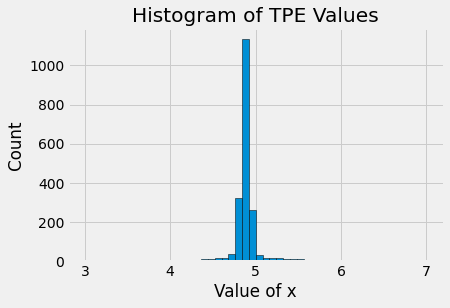

In [123]:
plt.hist(results_df['x'], bins = 50, edgecolor = 'k');
plt.title('Histogram of TPE Values'); plt.xlabel('Value of x'); plt.ylabel('Count');

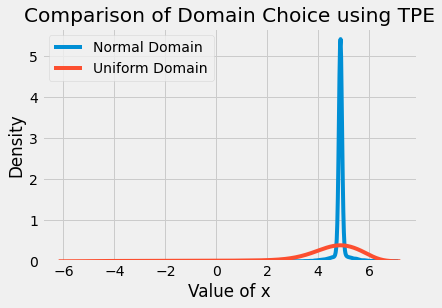

In [124]:
sns.kdeplot(results_df['x'], label = 'Normal Domain')
sns.kdeplot(tpe_results['x'], label = 'Uniform Domain')
plt.legend(); plt.xlabel('Value of x'); plt.ylabel('Density'); plt.title('Comparison of Domain Choice using TPE');

In [125]:
print('Lowest Value of the Objective Function = {:.4f} at x = {:.4f} found in {:.0f} iterations.'.format(results_df['loss'].min(),
                                                                             results_df.loc[results_df['loss'].idxmin()]['x'],
                                                                             results_df.loc[results_df['loss'].idxmin()]['iteration']))

Lowest Value of the Objective Function = -219.8012 at x = 4.8782 found in 1211 iterations.


In [126]:
# Just because you can do it in one line doesn't mean you should! 
best = fmin(fn = lambda x: np.poly1d([1, -2, -28, 28, 12, -26, 100])(x) * 0.05,
            space = hp.normal('x', 4.9, 0.5), algo=tpe.suggest, 
            max_evals = 2000)

best

100%|████| 2000/2000 [00:05<00:00, 353.06trial/s, best loss: -219.8012037290406]


{'x': 4.878085835182041}